# Optimization

In [9]:
help(optim)

In [12]:
require(graphics)

fr <- function(x) {   ## Rosenbrock Banana function
    x1 <- x[1]
    x2 <- x[2]
    100 * (x2 - x1 * x1)^2 + (1 - x1)^2
}
grr <- function(x) { ## Gradient of 'fr'
    x1 <- x[1]
    x2 <- x[2]
    c(-400 * x1 * (x2 - x1 * x1) - 2 * (1 - x1),
       200 *      (x2 - x1 * x1))
}
optim(c(-1.2,1),fr)

$par
[1] 1.000260 1.000506

$value
[1] 8.825241e-08

$counts
function gradient 
     195       NA 

$convergence
[1] 0

$message
NULL


In [ ]:
aa=function(x){
    x1=x[1]
    x2=x[2]
    x1
}
    

In [19]:
f <- function(x,y){
    2*x*(y**2)+2*(x**2)*y+x*y
    }
x=seq(-0.5,0.5,len=200)
y=seq(-0.5,0.5,len=200)

In [18]:
help(outer)

In [20]:
z=outer(x,y,f)

In [22]:
str(z) #structure of z

 num [1:200, 1:200] -0.25 -0.245 -0.24 -0.235 -0.23 ...


In [23]:
f(-.5,-.5)

[1] -0.25

In [30]:
f(x[1],y[1])
f(x[1],y[2])
f(x[1],y[3])
f(x[1],y[4])
f(x[1],y[5])

[1] -0.25

[1] -0.2450001

[1] -0.2400508

[1] -0.2351519

[1] -0.2303035

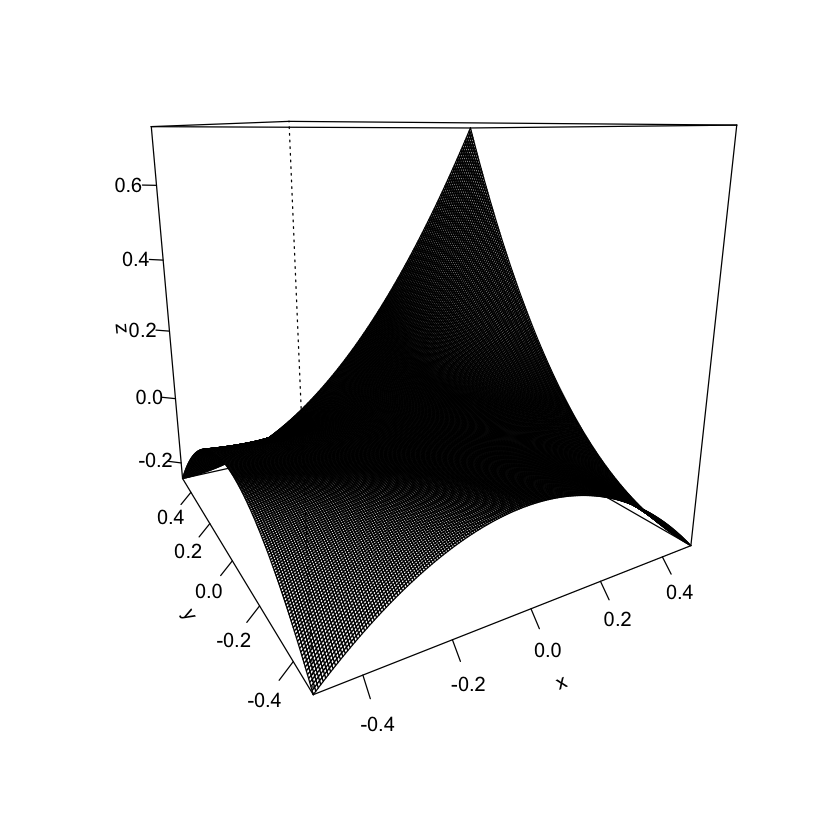

In [31]:
#To take a look at the 3-dimensional image, we can use the command “persp” (perspective).
persp(x,y,z,theta = -30,phi=15,ticktype = 'detailed')

#𝒙, 𝒚, 𝒛 are our three variables, theta=-30,phi=15 are the coordinates 
#of the angles from which we look at the graph, 
#and ticktype="detailed" displays the numerical values of the variables on the 3 axes.


The “persp” command gives us an accurate overview of the shape of our function but this is not enough to find optimizers.
For this purpose, we can use the “image” command, with𝒙,𝒚,𝒛 being the three variables of the function𝒇.

This command allows us to detect minima and maxima by showing us the height of the function at different points: lighter colors (yellow/white) indicate high regions, while darker red indicates that the function decreases.

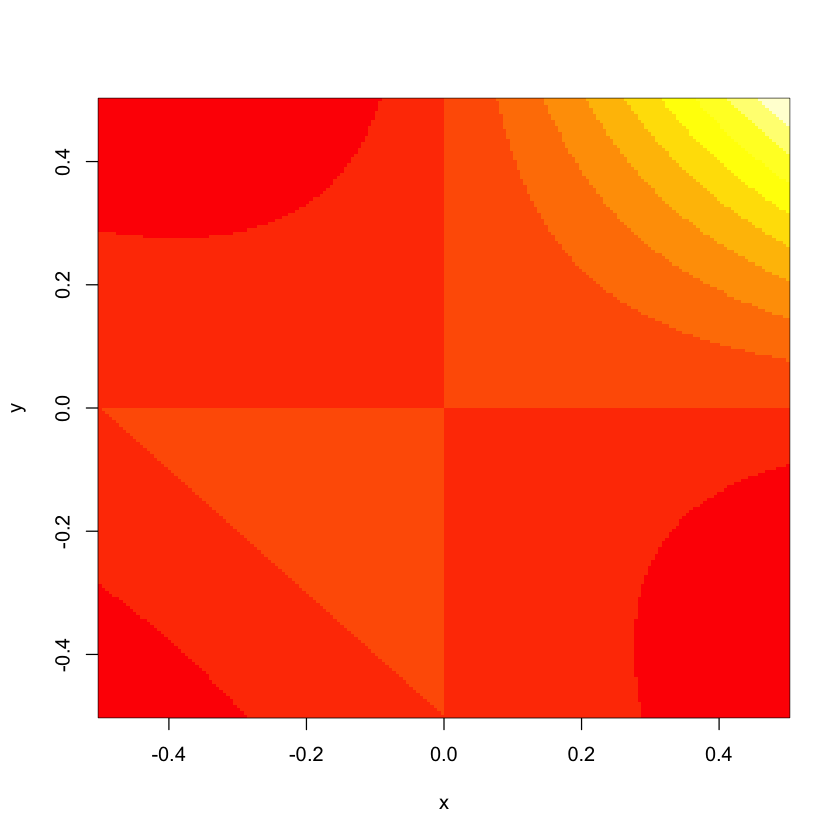

In [22]:
image(x,y,z)

Here, we notice that the angle at the upright boundary of the picture is almost “white”, while the remaining three are more “red”. However, this is not enough to conclude that these points are optimizers, since the function can grow or decrease to infinity. Instead, we can observe on the picture some “bright red” parts that meet forming a cross. This allows us to identify three saddle points.
Now we must obtain the partial derivatives in order to draw the zero level sets that will show us precisely, through their intersections, where the stationary points are located.

In [1]:
#The partial derivative with respect to 𝒙 in R is:
fx=function(x,y,h=0.001){
    (f(x+h,y)-f(x,y))/h
}
fy=function(x,y,h=0.001){
    (f(x,y+h)-f(x,y))/h
}

We now re-use the other function to compute the 𝒛 values corresponding to the partial derivatives. 
Thus 𝒛𝒇𝒙 and 𝒛𝒇𝒚 are matrices, 200 rows and 200 columns, with values of 𝒇𝒙 and 𝒇𝒚 respectively.

In [6]:
zfx=outer(x,y,fx) #values of the pd corresponsing to x and y
zfy=outer(x,y,fy)

In [8]:
str(zfx)

 num [1:200, 1:200] 0.999 0.989 0.979 0.969 0.959 ...


Now we are perfectly able, using the “contour” function. This command draws lines that show the level sets of the function you insert as an input. If we use it with respect to both partial derivatives at the zero level, it becomes possible to see the stationary points, which are: 
* Saddle points where the lines cross;
* Maxima and minima where we observe small circles.

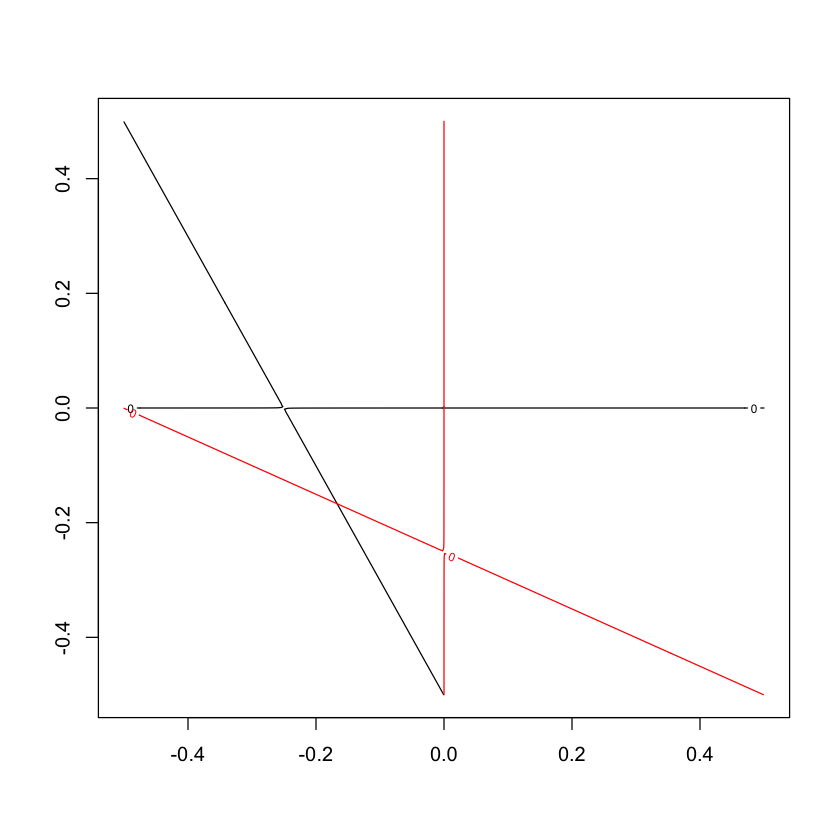

In [9]:
contour(x,y,zfx,level=0)
contour(x,y,zfy,level=0,add=T,col='red')

When giving the command we write:
    
    * the two variables, 𝒙 and 𝒚;
    * the function for which we want to see the level sets.
    * level =0 because we are not interested just in the others.
To the command that draws the zero level sets of zfy, we add:
    
    * add=T to impose this graph over the previous one;
    * col=”red” to change the colors of the line, to distinguish properly the contours for 𝒇𝒙 and 𝒇𝒚.

Afterwards, it is straightforward to observe the 4 stationary points at the four crossing points. We can read the coordinates of the points directly on the axis of the pictures.
From the image picture we have found just three saddle points,
and no maxima or minima, while here we see the zero level sets crossing in 4 points. This means that we still do not know the nature of one stationary point. To understand what kind of optimizer it is, we must zoom on its area, changing the proportions of the axis

In [23]:
#We do this through “seq” (choosing a shorter interval for x and y), and defining 𝒛 correspondingly.
x=seq(-0.2,0,len=400)
y=seq(-0.2,0,len=400)
z=outer(x,y,f)

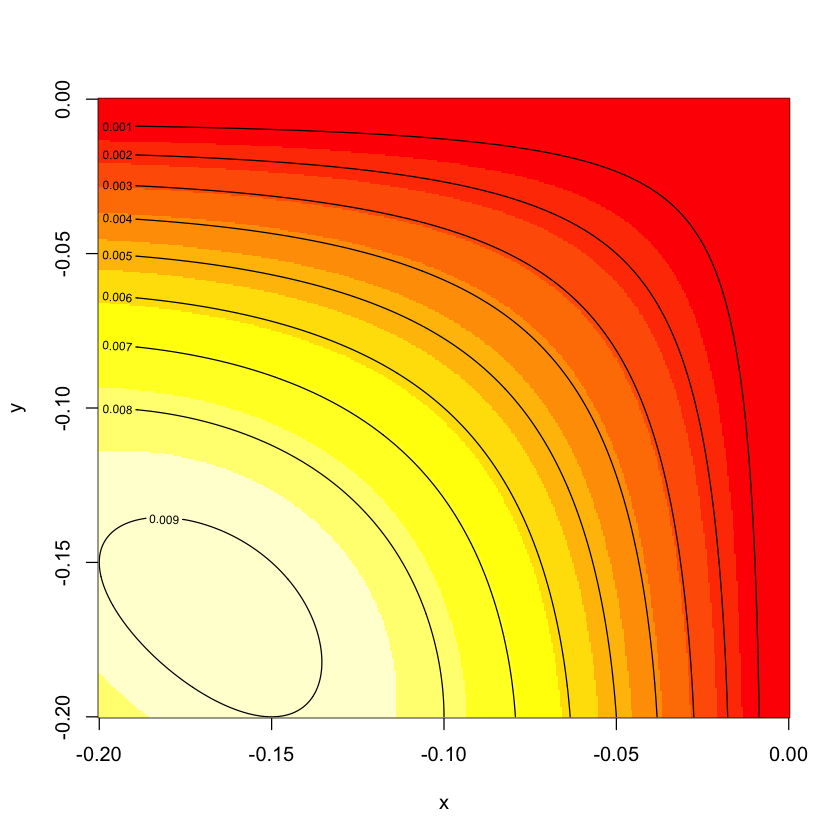

In [24]:
image(x,y,z)
contour(x,y,z,add=T)

Finally, we can spot a circle in a very bright area. This is precisely where our maximum lies.

# Algebraic Solution

It is possible to find the exact coordinates of the stationary points of a function, using the command “optim”.
In principle, the “optim” command does not read multivariate functions. However, it is possible to transform our bivariate function into a univariate one, by changing the names of the two variables x and y, into 𝒙[𝟏] and 𝒙[𝟐].

In [25]:
fbb= function(x){
    f(x[1],x[2])
}

The logic behind this transformation, is that [ ] means extraction. So, 𝒙[𝟏] and 𝒙[𝟐] are viewed by R as elements belonging to the same vector 𝒙.
Here, we simply plug the values 𝒙[𝟏] and 𝒙[𝟐] into the function 𝒇, so that 𝒙[𝟏]= 𝒙, and 𝒙[𝟐] = 𝒚.
Next, we use “optim” to find the coordinates of our maximizer. Remember is that R finds one stationary point at a time. Moreover, by default R just givesthe coordinates of the minima. Two parameters are needed: an approximate guess of where the critical point might be and the name of the function.
Since we have a maximizer, the best way to overcome the “minimizer-default” of R is to reverse the function down, so that the original minimizer becomes now a maximizer. This is done by changing the sign of the value corresponding to the parameter “fnscale”.

In [29]:
optim(c(0.5,0.5),fbb,control = list(fnscale=-1))

$par
[1] 7.520169e+54 3.678305e+54

$value
[1] 6.195327e+164

$counts
function gradient 
     501       NA 

$convergence
[1] 1

$message
NULL


In [32]:
print(7.520169e+54,scientific=F)


[1] 7.520169e+54
